In [73]:
! pip install yfinance

In [74]:
#Importing all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.manifold import TSNE
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score,  precision_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [75]:
#Initialising ticker class which will enable us to download price history
msft = yf.Ticker("MSFT")

#Query the historical prices of Miscrosoft and storing it.
msft = msft.history(period="max")

msft

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055121,0.063227,0.055121,0.060524,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060524,0.063767,0.060524,0.062686,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062686,0.064307,0.062686,0.063767,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063767,0.064308,0.061605,0.062145,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062145,0.062686,0.060524,0.061065,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-12 00:00:00-04:00,336.600006,341.649994,335.670013,337.200012,29995300,0.0,0.0
2023-07-13 00:00:00-04:00,339.559998,343.739990,339.019989,342.660004,20567200,0.0,0.0
2023-07-14 00:00:00-04:00,347.589996,351.429993,344.309998,345.239990,28302200,0.0,0.0


In [76]:
#The Dividends and Stock splits are not useful for index, so dropping the columns
del msft['Dividends']
del msft['Stock Splits']

msft

,Open,High,Low,Close,Volume
Date,,,,,
1986-03-13 00:00:00-05:00,0.055121,0.063227,0.055121,0.060524,1031788800
1986-03-14 00:00:00-05:00,0.060524,0.063767,0.060524,0.062686,308160000
1986-03-17 00:00:00-05:00,0.062686,0.064307,0.062686,0.063767,133171200
1986-03-18 00:00:00-05:00,0.063767,0.064308,0.061605,0.062145,67766400
1986-03-19 00:00:00-05:00,0.062145,0.062686,0.060524,0.061065,47894400
...,...,...,...,...,...
2023-07-12 00:00:00-04:00,336.600006,341.649994,335.670013,337.200012,29995300
2023-07-13 00:00:00-04:00,339.559998,343.739990,339.019989,342.660004,20567200
2023-07-14 00:00:00-04:00,347.589996,351.429993,344.309998,345.239990,28302200


In [77]:
msft['Tomorrow'] = msft['Close'].shift(-1)

msft

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1986-03-13 00:00:00-05:00,0.055121,0.063227,0.055121,0.060524,1031788800,0.062686
1986-03-14 00:00:00-05:00,0.060524,0.063767,0.060524,0.062686,308160000,0.063767
1986-03-17 00:00:00-05:00,0.062686,0.064307,0.062686,0.063767,133171200,0.062145
1986-03-18 00:00:00-05:00,0.063767,0.064308,0.061605,0.062145,67766400,0.061065
1986-03-19 00:00:00-05:00,0.062145,0.062686,0.060524,0.061065,47894400,0.059444
...,...,...,...,...,...,...
2023-07-12 00:00:00-04:00,336.600006,341.649994,335.670013,337.200012,29995300,342.660004
2023-07-13 00:00:00-04:00,339.559998,343.739990,339.019989,342.660004,20567200,345.239990
2023-07-14 00:00:00-04:00,347.589996,351.429993,344.309998,345.239990,28302200,345.730011


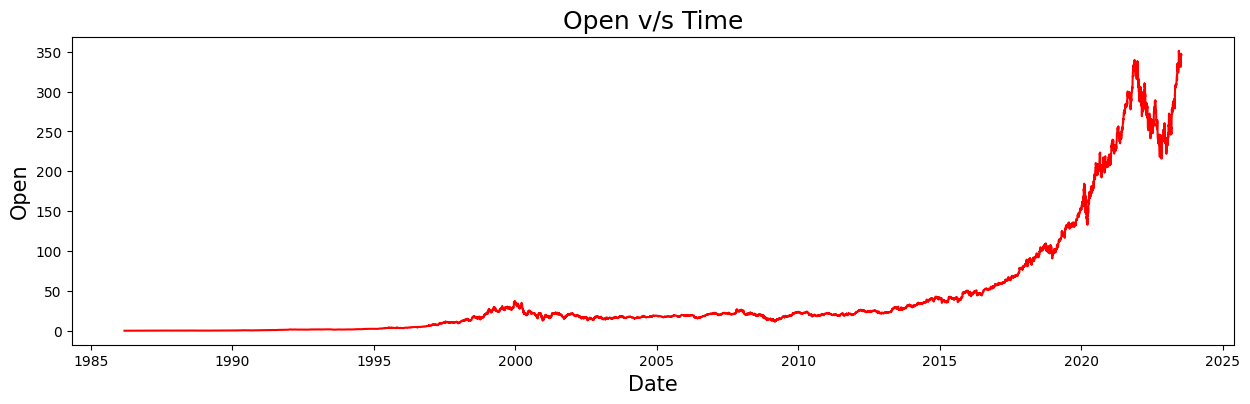

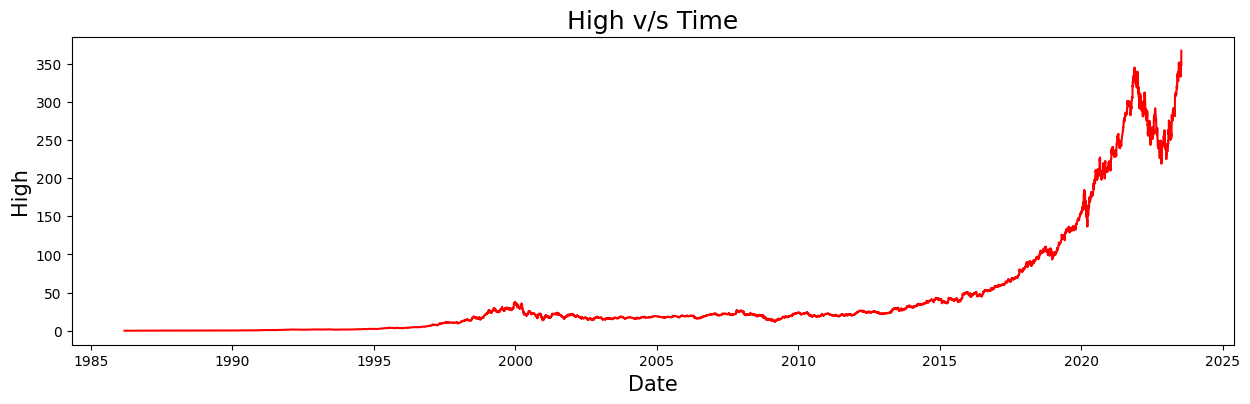

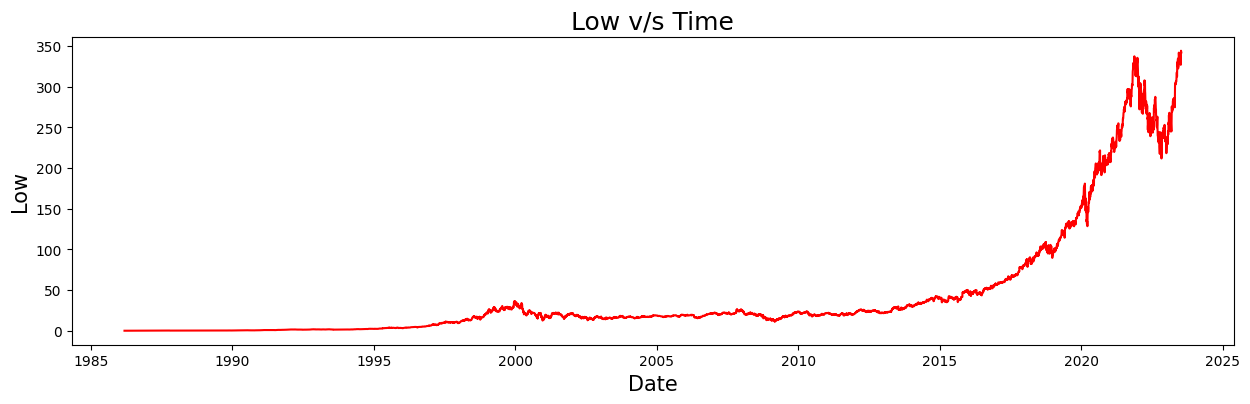

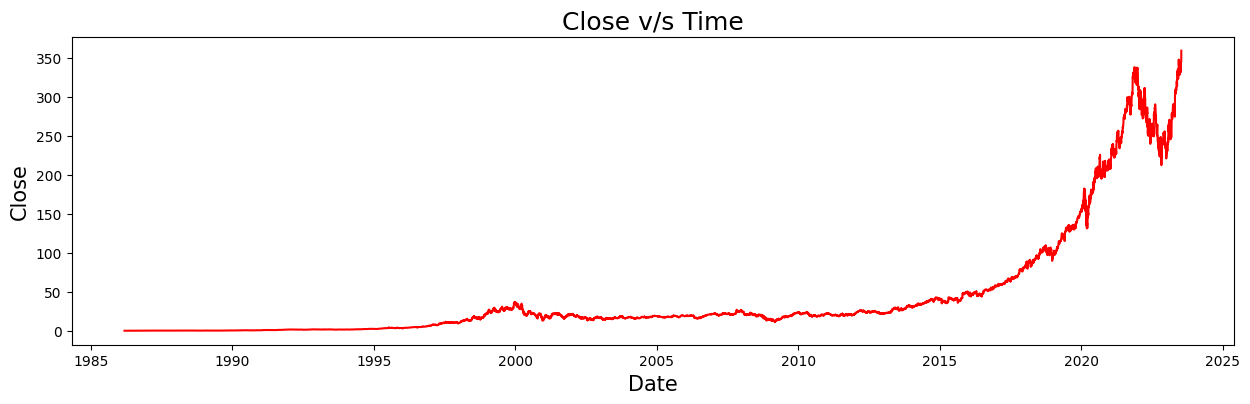

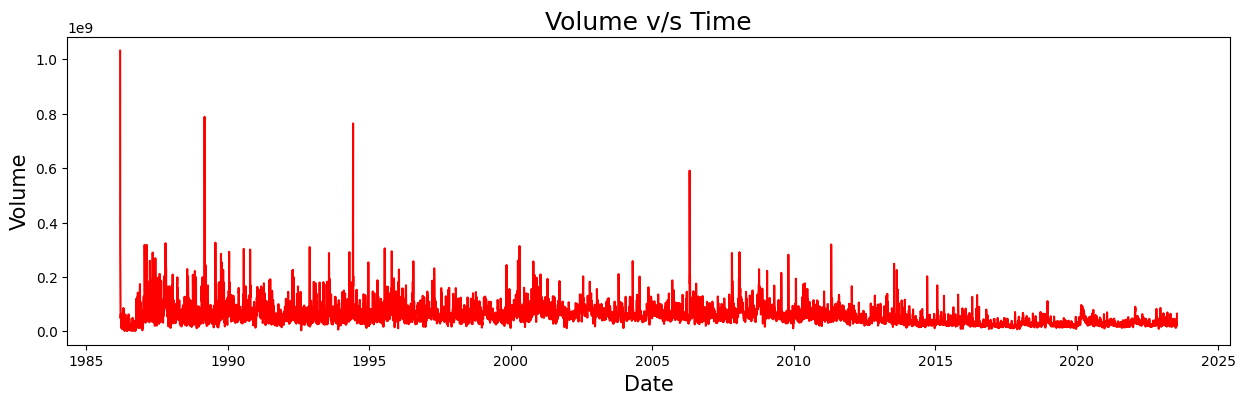

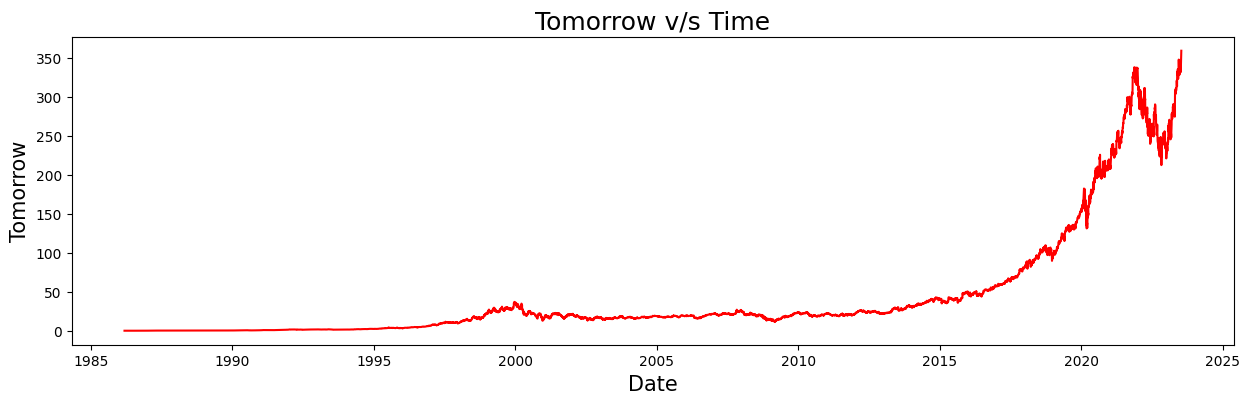

In [78]:
cols=msft.columns.values
for x in cols:
    plt.figure(figsize=(15,4))
    plt.plot(msft[x], 'r')
    plt.xlabel('Date', fontsize = 15)
    # plt.xlim('1986','2023')
    plt.ylabel(x, fontsize = 15)
    plt.title(x + ' v/s Time', fontsize = 18)
    plt.show()

In [79]:
for i in msft.columns.values:
  msft[i]=np.log(msft[i])

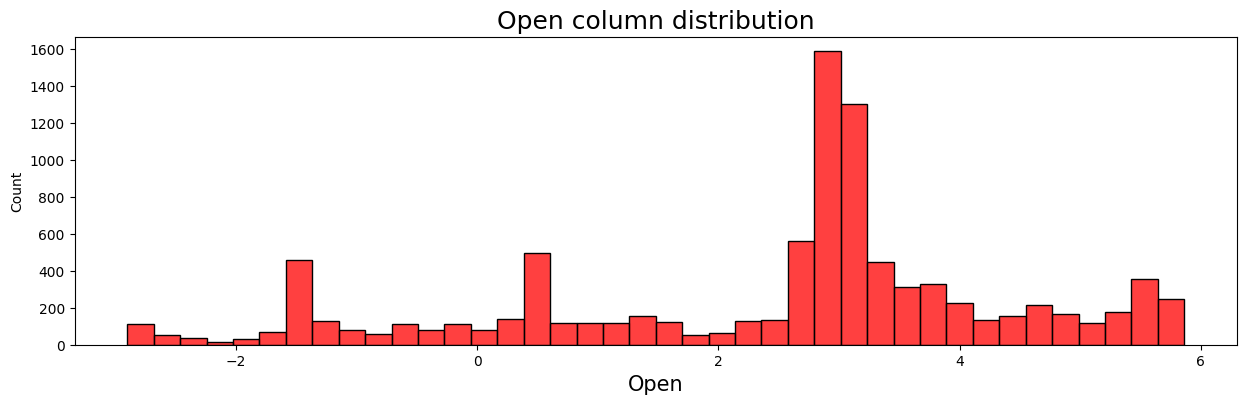

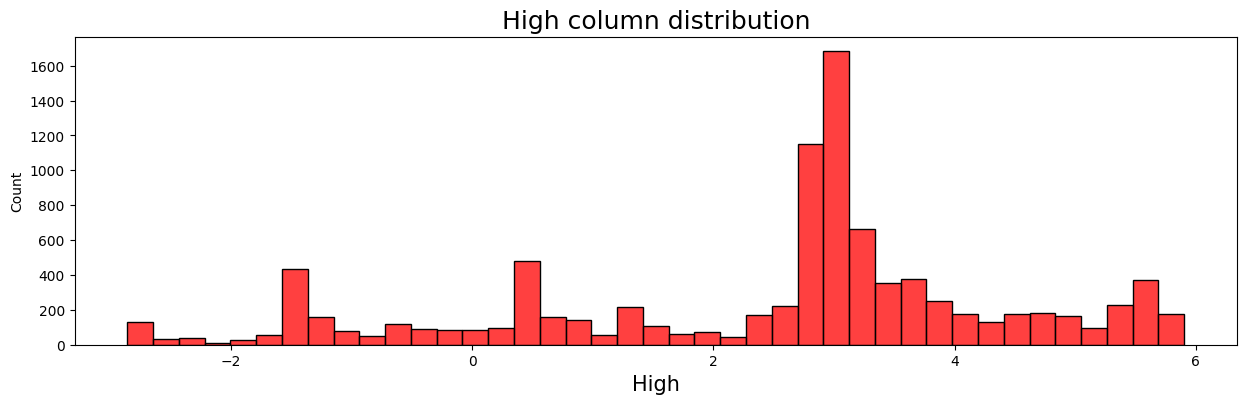

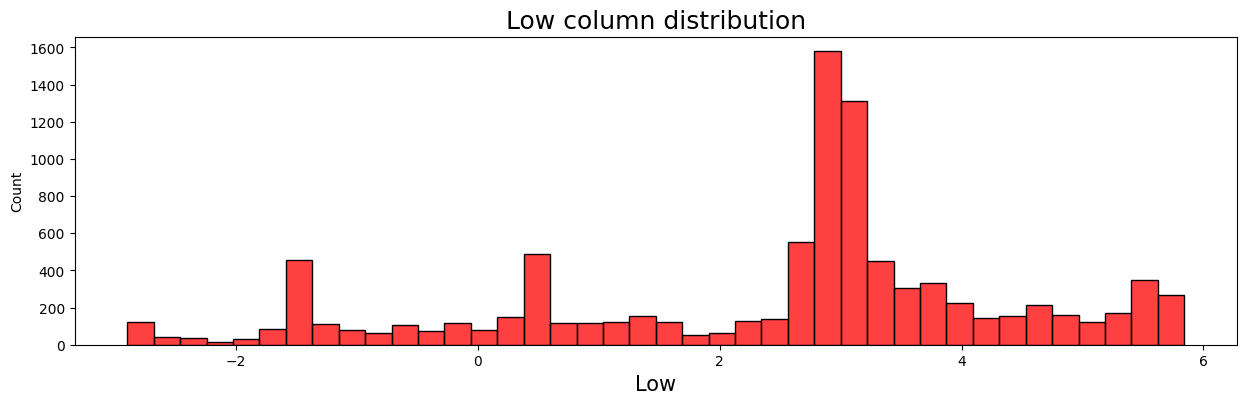

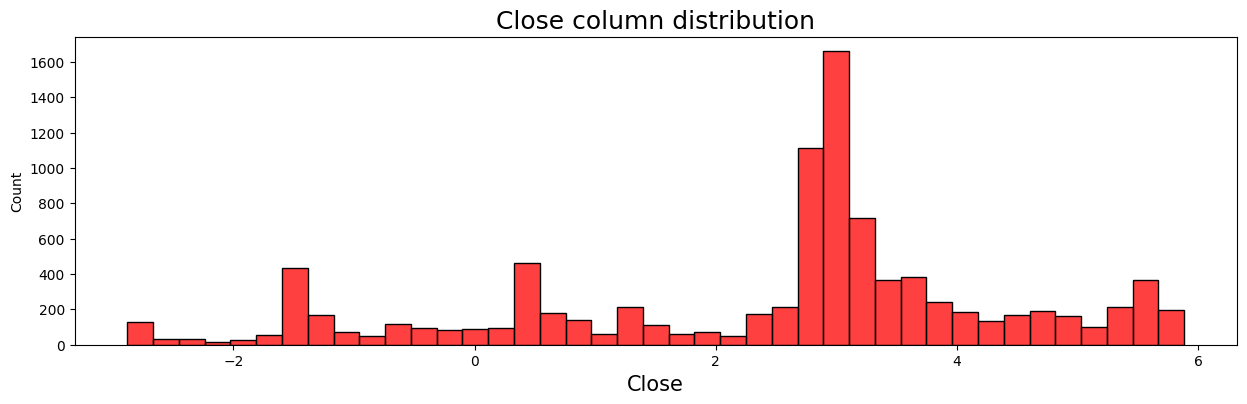

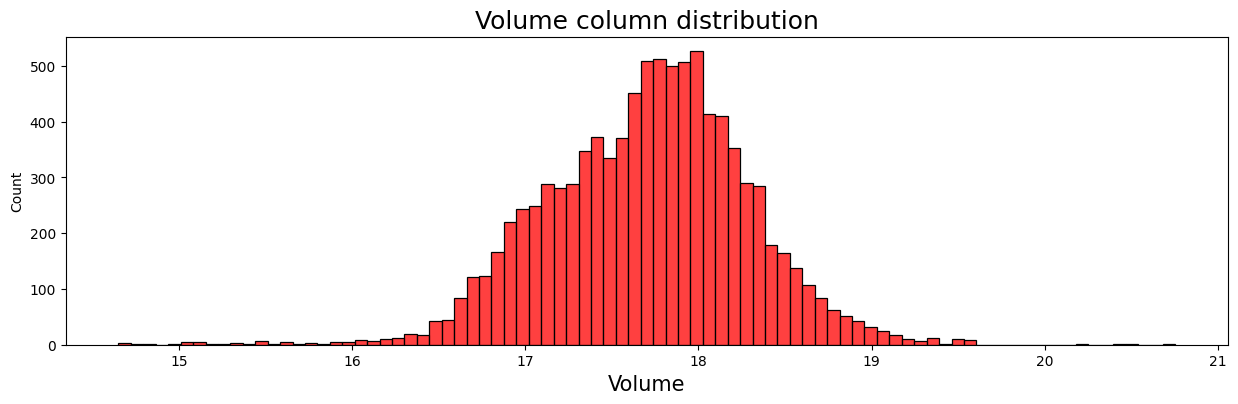

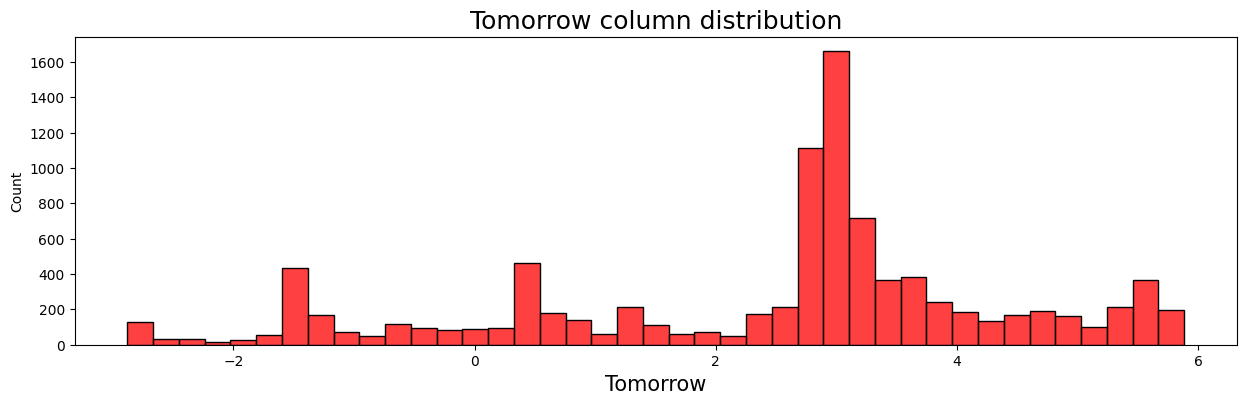

In [80]:
for x in cols:
    plt.figure(figsize=(15, 4))
    sns.histplot(msft[x], color='red')
    plt.xlabel(x, fontsize=15)
    plt.title(x + ' column distribution', fontsize=18)
    plt.show()

In [81]:
msft['Target'] = (msft['Tomorrow']> msft['Close']).astype(int)

msft

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1986-03-13 00:00:00-05:00,-2.898230,-2.761028,-2.898230,-2.804710,20.754560,-2.769621,1
1986-03-14 00:00:00-05:00,-2.804710,-2.752518,-2.804710,-2.769621,19.546130,-2.752517,1
1986-03-17 00:00:00-05:00,-2.769621,-2.744079,-2.769621,-2.752517,18.707146,-2.778278,0
1986-03-18 00:00:00-05:00,-2.752517,-2.744079,-2.787011,-2.778278,18.031577,-2.795822,0
1986-03-19 00:00:00-05:00,-2.778279,-2.769621,-2.804710,-2.795822,17.684509,-2.822727,0
...,...,...,...,...,...,...,...
2023-07-12 00:00:00-04:00,5.818895,5.833787,5.816129,5.820676,17.216551,5.836739,1
2023-07-13 00:00:00-04:00,5.827651,5.839886,5.826059,5.836739,16.839208,5.844240,1
2023-07-14 00:00:00-04:00,5.851024,5.862011,5.841542,5.844240,17.158450,5.845658,1


In [82]:
msft_90s = msft.loc["1990-01-01":]

msft_90s

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,-0.974987,-0.957942,-0.987966,-0.957942,17.786466,-0.952323,1
1990-01-03 00:00:00-05:00,-0.949526,-0.941182,-0.960763,-0.952323,18.549728,-0.923335,1
1990-01-04 00:00:00-05:00,-0.952323,-0.921976,-0.957942,-0.923335,18.649733,-0.948130,0
1990-01-05 00:00:00-05:00,-0.927425,-0.921976,-0.949526,-0.948130,18.057792,-0.932906,1
1990-01-08 00:00:00-05:00,-0.949526,-0.932906,-0.960763,-0.932906,17.892750,-0.935657,0
...,...,...,...,...,...,...,...
2023-07-12 00:00:00-04:00,5.818895,5.833787,5.816129,5.820676,17.216551,5.836739,1
2023-07-13 00:00:00-04:00,5.827651,5.839886,5.826059,5.836739,16.839208,5.844240,1
2023-07-14 00:00:00-04:00,5.851024,5.862011,5.841542,5.844240,17.158450,5.845658,1


In [83]:
msft_90s = msft_90s.dropna()

msft_90s

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,-0.974987,-0.957942,-0.987966,-0.957942,17.786466,-0.952323,1
1990-01-03 00:00:00-05:00,-0.949526,-0.941182,-0.960763,-0.952323,18.549728,-0.923335,1
1990-01-04 00:00:00-05:00,-0.952323,-0.921976,-0.957942,-0.923335,18.649733,-0.948130,0
1990-01-05 00:00:00-05:00,-0.927425,-0.921976,-0.949526,-0.948130,18.057792,-0.932906,1
1990-01-08 00:00:00-05:00,-0.949526,-0.932906,-0.960763,-0.932906,17.892750,-0.935657,0
...,...,...,...,...,...,...,...
2023-07-11 00:00:00-04:00,5.802300,5.807722,5.789960,5.806550,17.100107,5.820676,1
2023-07-12 00:00:00-04:00,5.818895,5.833787,5.816129,5.820676,17.216551,5.836739,1
2023-07-13 00:00:00-04:00,5.827651,5.839886,5.826059,5.836739,16.839208,5.844240,1


<ipython-input-84-f931ee2e4d62>:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  ax.stem(msft_90s.index, msft_90s.Close , 'b', markerfmt='bo', label='open value percentage',use_line_collection=True)


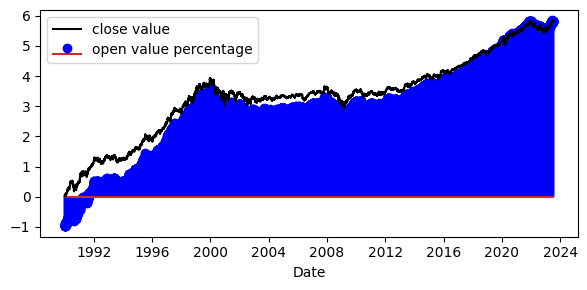

In [84]:
import matplotlib.pyplot as plt
scaledvolume =  msft_90s["Open"] - msft_90s["Open"].min()
scaledvolume = scaledvolume/scaledvolume.max() * msft_90s.Close.max()

fig, ax = plt.subplots(figsize=(6, 3))

ax.stem(msft_90s.index, msft_90s.Close , 'b', markerfmt='bo', label='open value percentage',use_line_collection=True)
ax.plot(msft_90s.index, scaledvolume, 'k', label='close value')

ax.set_xlabel('Date')
plt.legend()

plt.tight_layout()
plt.show()

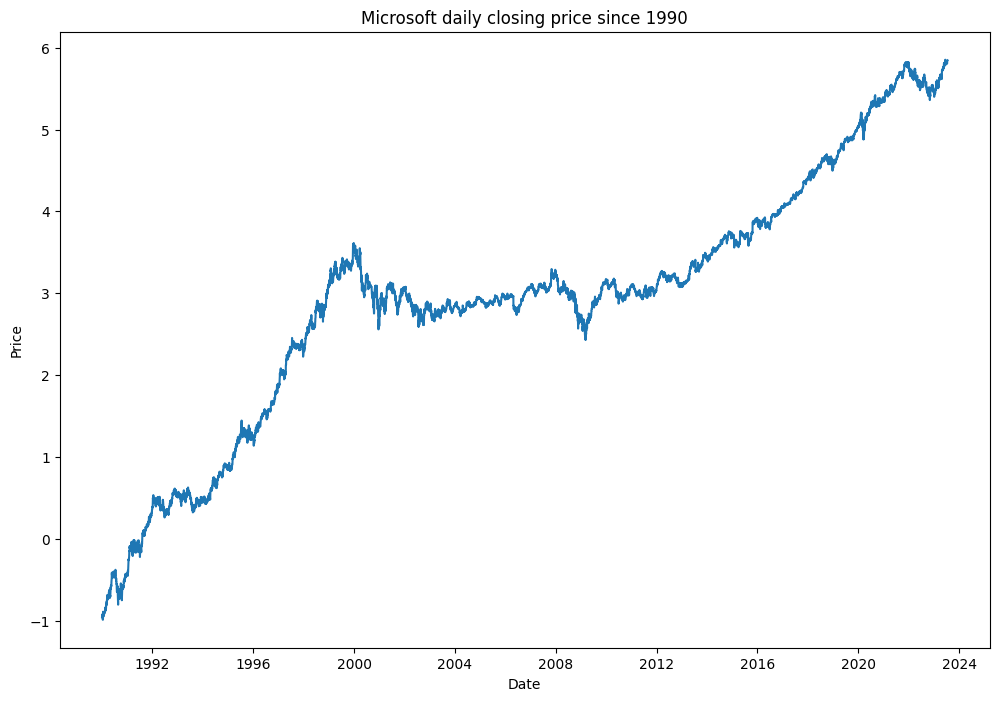

In [85]:
plt.figure(figsize=(12,8))
plt.plot(msft_90s["Close"])
plt.title("Microsoft daily closing price since 1990")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

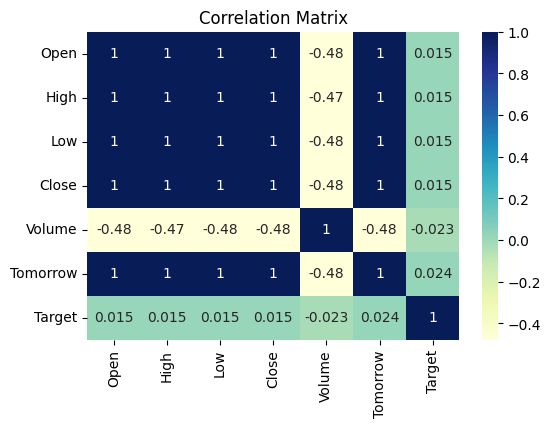

In [86]:
# Assuming you have a DataFrame called 'data' containing the data

# Compute the correlation matrix
correlation_matrix = msft_90s.corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")

# Customize the plot
plt.title("Correlation Matrix")

# Display the plot
plt.show()

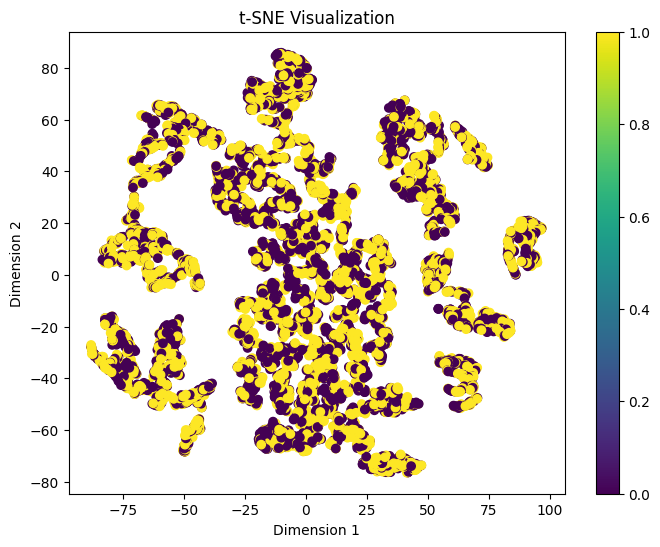

In [87]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming you have the 'msft_90s' DataFrame containing the data
msft_90s = msft_90s.copy()

# Create a t-SNE instance
tsne = TSNE(n_components=2, random_state=1)

# Apply t-SNE to the data
tsne_data = tsne.fit_transform(msft_90s.drop('Target', axis=1))

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_data, columns=['Dimension 1', 'Dimension 2'])

# Add the 'Target' column back to the t-SNE DataFrame
tsne_df['Target'] = msft_90s['Target'].values

# Plot the t-SNE visualization with different colors for the 'Target' column
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=tsne_df['Target'], cmap='viridis')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization')
plt.colorbar()
plt.show()

In [88]:
#splitting data
train = msft_90s.iloc[:-100]
test = msft_90s.iloc[-100:]

predictors = ["Close","Volume","Open","High","Low"]
target = ["Target"]

In [89]:
# Split data into X and y
X = msft_90s[predictors]
y = msft_90s[target]

In [90]:
X_train = train[predictors]
X_test = test[predictors]
y_train = train[target]
y_test = test[target]

In [91]:
def plot_predictions(y_pred, y_test):
    # Generate x-coordinates for the plot
    x_coords = range(len(y_test))

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_coords, y_test, marker='o', linestyle='-', linewidth=2, label='True Labels')
    plt.plot(x_coords, y_pred, marker='*', linestyle='-', linewidth=2, label='Predicted Labels')
    plt.xlabel('Sample Index')
    plt.ylabel('Label')
    plt.title('True Labels vs. Predicted Labels')
    plt.legend()
    plt.show()

In [92]:
accuracy_dict = {}
precision_dict = {}

# Random Forest

In [93]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators = 100, min_samples_split=100, random_state=1)

# Train the model
rf_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)
accuracy_dict["Random Forest"] = rf_accuracy*100
print("Accuracy:", rf_accuracy*100)

Accuracy: 53.0


In [94]:
#calculatin precision recall
preds_forest = pd.Series(rf_y_pred, index = X_test.index)

# calculating the precision score
precision_score(y_test , preds_forest)
precision_dict["Random Forest"] = precision_score(y_test , preds_forest)
print("Precision:", precision_score(y_test , preds_forest))

Precision: 0.6052631578947368


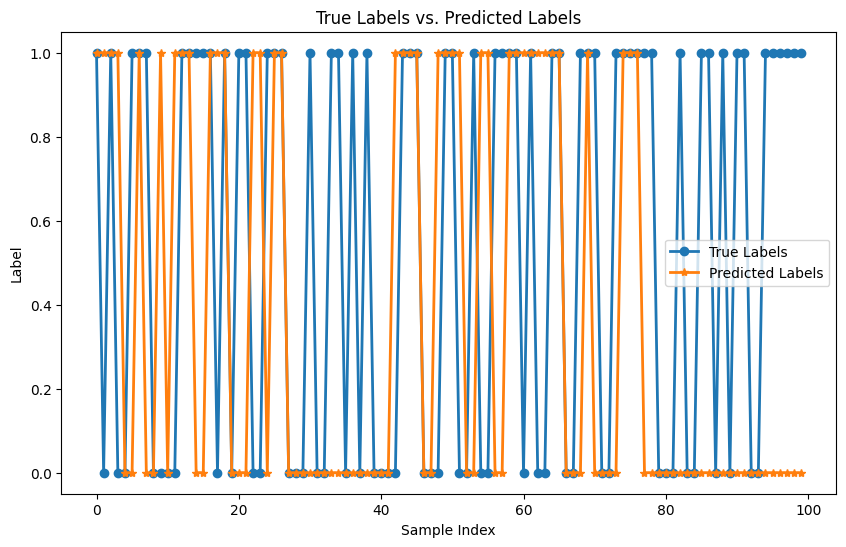

In [95]:
plot_predictions(preds_forest, y_test)

# Support Vector Machine (SVM)

In [96]:
# Create an SVM model
svm_model = SVC(probability=True)

# Train the model
svm_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
svm_y_pred = svm_model.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, svm_y_pred)
accuracy_dict["SVM"] = svm_accuracy*100
print("Accuracy:", svm_accuracy*100)

Accuracy: 55.00000000000001


In [97]:
#calculatin precision recall
preds_svm = pd.Series(svm_y_pred, index = X_test.index)

# calculating the precision score
precision_score(y_test , preds_svm)
precision_dict["SVM"] = precision_score(y_test , preds_svm)
print("Precision:", precision_score(y_test , preds_svm))

Precision: 0.55


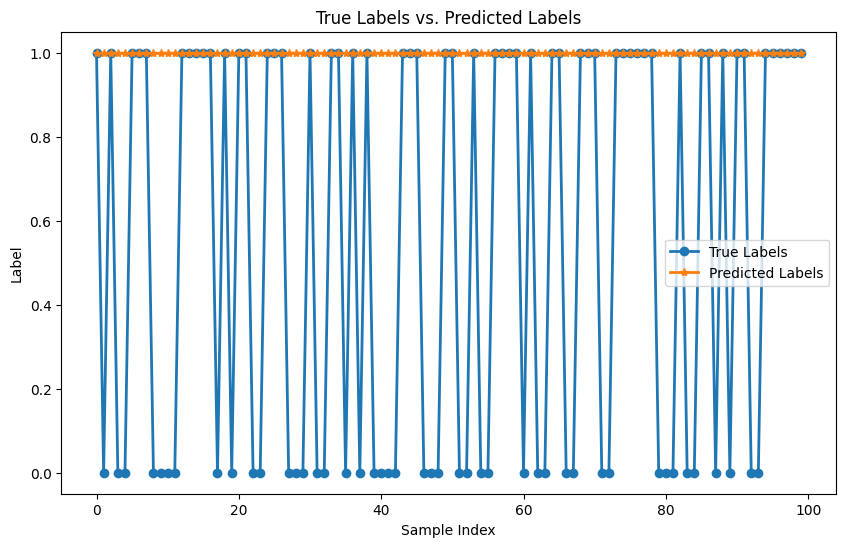

In [98]:
plot_predictions(svm_y_pred, y_test)

# K Nearest Neighbor (KNN)

In [99]:
# Create a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=9)

# Train the model
knn_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
knn_y_pred = knn_model.predict(X_test)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_y_pred)
accuracy_dict["KNN"] = knn_accuracy*100
print("Accuracy:", knn_accuracy*100)

Accuracy: 61.0


In [100]:
#calculatin precision recall
preds_knn = pd.Series(knn_y_pred, index = X_test.index)

# calculating the precision score
precision_score(y_test , preds_knn)
precision_dict["KNN"] = precision_score(y_test , preds_knn)
print("Precision:", precision_score(y_test , preds_knn))

Precision: 0.6538461538461539


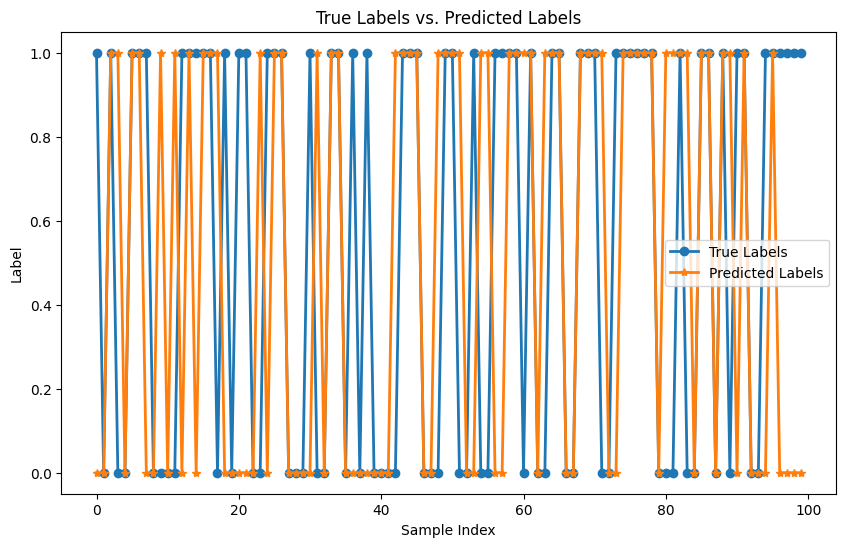

In [101]:
plot_predictions(knn_y_pred, y_test)

# DecisionTree

In [102]:
# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier(min_samples_split=200, random_state=1)

# Train the model
dt_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
dt_y_pred = dt_model.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, dt_y_pred)
accuracy_dict["Decision Tree"] = dt_accuracy*100
print("Accuracy:", dt_accuracy*100)

Accuracy: 51.0


In [103]:
#calculatin precision recall
preds_dt = pd.Series(dt_y_pred, index = X_test.index)

# calculating the precision score
precision_score(y_test , preds_dt)
precision_dict["Decision Tree"] = precision_score(y_test , preds_dt)
print("Precision:", precision_score(y_test , preds_dt))

Precision: 0.65


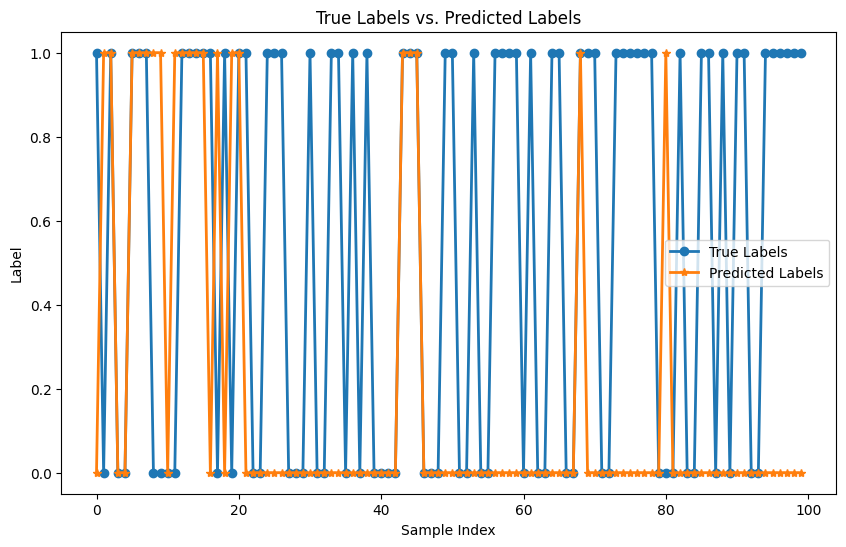

In [104]:
plot_predictions(dt_y_pred, y_test)

# Ada Boosting

In [105]:
# Create an AdaBoost classifier with tuned hyperparameters
adaboost_model = AdaBoostClassifier(n_estimators=40, learning_rate=0.8, random_state=1)

# Train the model
adaboost_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
adaboost_y_pred = adaboost_model.predict(X_test)

# Calculate accuracy
adaboost_accuracy = accuracy_score(y_test, adaboost_y_pred)
accuracy_dict["Ada Boosting"] = adaboost_accuracy*100
print("Accuracy:", adaboost_accuracy*100)

Accuracy: 56.00000000000001


In [106]:
#calculatin precision recall
preds_ada = pd.Series(adaboost_y_pred, index = X_test.index)

# calculating the precision score
precision_score(y_test , preds_ada)
precision_dict["Ada Boosting"] = precision_score(y_test , preds_ada)
print("Precision:", precision_score(y_test , preds_ada))

Precision: 0.627906976744186


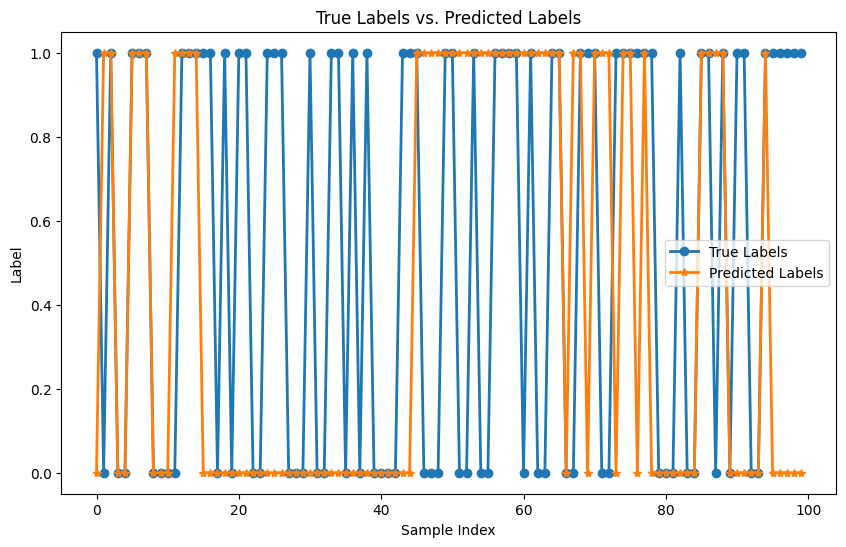

In [107]:
plot_predictions(adaboost_y_pred, y_test)

# Gradient Boosting

In [108]:
# Create a Gradient Boosting classifier
boosting_model = GradientBoostingClassifier(n_estimators=30, learning_rate=0.3, random_state=1)

# Train the model
boosting_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
boosting_y_pred = boosting_model.predict(X_test)

# Calculate accuracy
boosting_accuracy = accuracy_score(y_test, boosting_y_pred)
accuracy_dict["Gradient Boosting"] = boosting_accuracy*100
print("Accuracy:", boosting_accuracy*100)

Accuracy: 49.0


In [109]:
#calculatin precision recall
preds_gb = pd.Series(boosting_y_pred, index = X_test.index)

# calculating the precision score
precision_score(y_test , preds_gb)
precision_dict["Gradient Boosting"] = precision_score(y_test , preds_gb)
print("Precision:", precision_score(y_test , preds_gb))

Precision: 0.5454545454545454


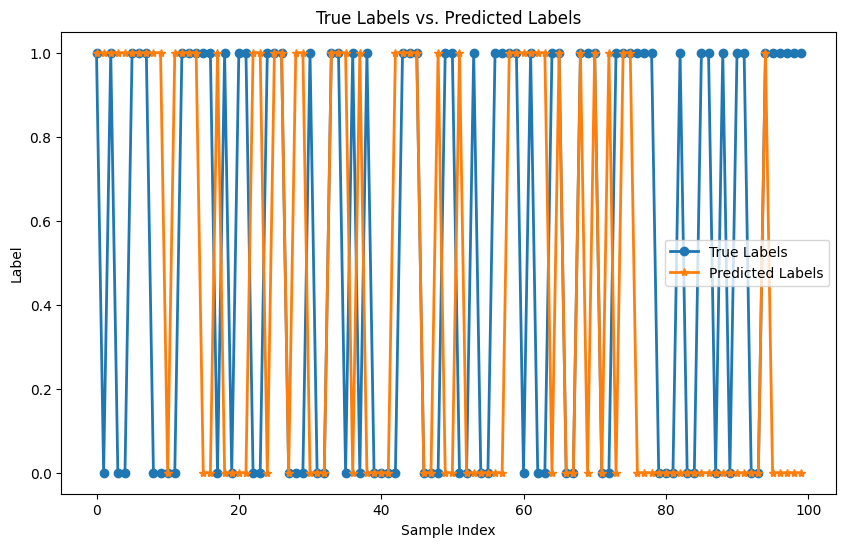

In [110]:
plot_predictions(boosting_y_pred, y_test)

# Gaussian Naive Bayes

In [111]:
# Create a Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
nb_y_pred = nb_model.predict(X_test)

# Calculate accuracy
nb_accuracy = accuracy_score(y_test, nb_y_pred)
accuracy_dict["Naive Bayes"] = nb_accuracy*100
print("Accuracy:", nb_accuracy*100)

Accuracy: 55.00000000000001


In [112]:
#calculatin precision recall
preds_nb = pd.Series(nb_y_pred, index = X_test.index)

# calculating the precision score
precision_score(y_test , preds_nb)
precision_dict["Naive Bayes"] = precision_score(y_test , preds_nb)
print("Precision:", precision_score(y_test , preds_nb))

Precision: 0.55


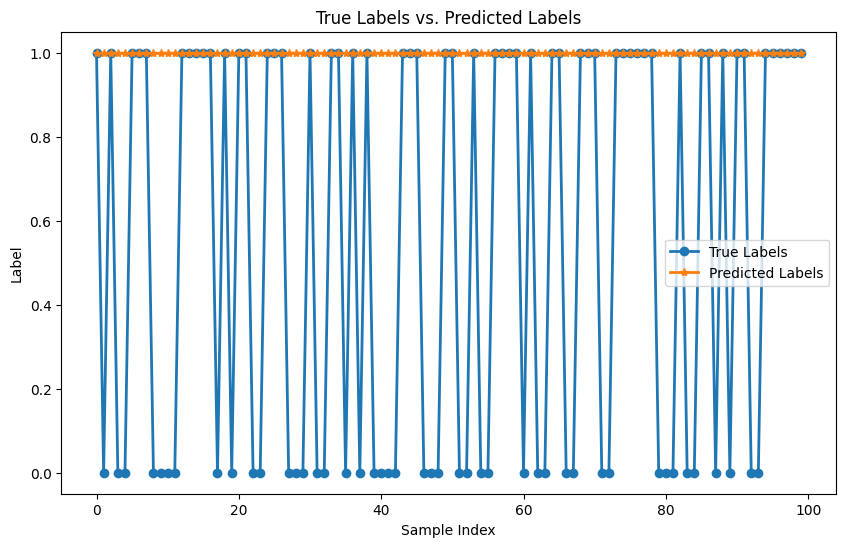

In [113]:
plot_predictions(nb_y_pred, y_test)

# Logistic Regression

In [114]:
# Create a Logistic Regression classifier
logistic_model = LogisticRegression(random_state=1)

# Train the model
logistic_model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
logistic_y_pred = logistic_model.predict(X_test)

# Calculate accuracy
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
accuracy_dict["Logistic Regression"] = logistic_accuracy*100
print("Accuracy:", logistic_accuracy*100)

Accuracy: 54.0


In [115]:
#calculatin precision recall
preds_lr = pd.Series(logistic_y_pred, index = X_test.index)

# calculating the precision score
precision_score(y_test , preds_lr)
precision_dict["Logistic Regression"] = precision_score(y_test , preds_lr)
print("Precision:", precision_score(y_test , preds_lr))

Precision: 0.5454545454545454


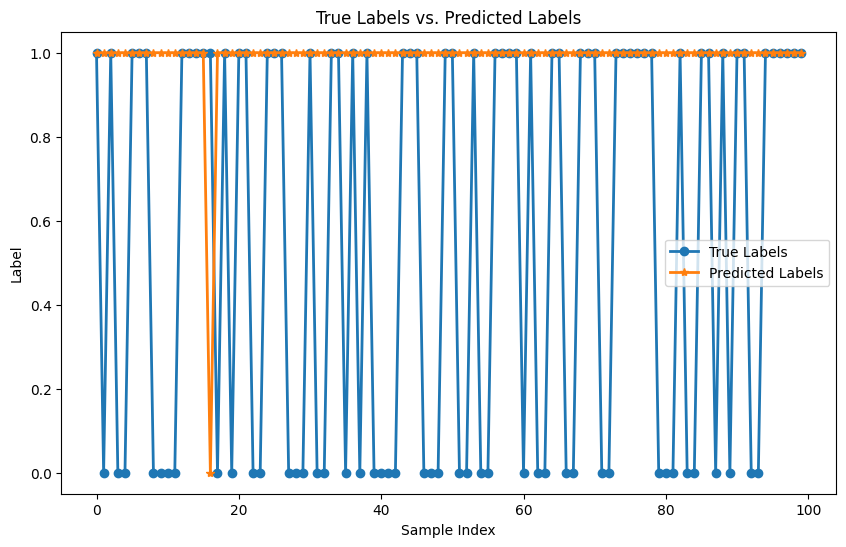

In [116]:
plot_predictions(logistic_y_pred, y_test)

# LSTM

In [117]:
# Convert the training and test data to numpy arrays
X_train_arr = np.array(X_train)
y_train_arr = np.array(y_train)
X_test_arr = np.array(X_test)
y_test_arr = np.array(y_test)

# Reshape the input data to match the expected LSTM input shape
X_train_lstm = np.reshape(X_train_arr, (X_train_arr.shape[0], 1, X_train_arr.shape[1]))
X_test_lstm = np.reshape(X_test_arr, (X_test_arr.shape[0], 1, X_test_arr.shape[1]))

# Define the LSTM model
lstm_model = Sequential()

# Add LSTM layer
lstm_model.add(LSTM(units=64, input_shape=(1, len(predictors))))

# Add a dense output layer
lstm_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32)
lstm_y_pred = lstm_model.predict(X_test_lstm)

# Evaluate the model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test)
accuracy_dict["LSTM"] = lstm_accuracy*100

# print("Loss:", loss)
print("Accuracy:", lstm_accuracy*100)

Epoch 1/10
261/261 [==============================] - 2s 2ms/step - loss: 0.6937 - accuracy: 0.5051
Epoch 2/10
261/261 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4991
Epoch 3/10
261/261 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.5027
Epoch 4/10
261/261 [==============================] - 1s 3ms/step - loss: 0.6936 - accuracy: 0.5017
Epoch 5/10
261/261 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.5037
Epoch 6/10
261/261 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.4966
Epoch 7/10
261/261 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.5050
Epoch 8/10
261/261 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.5098
Epoch 9/10
261/261 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.5099
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5500
Acc

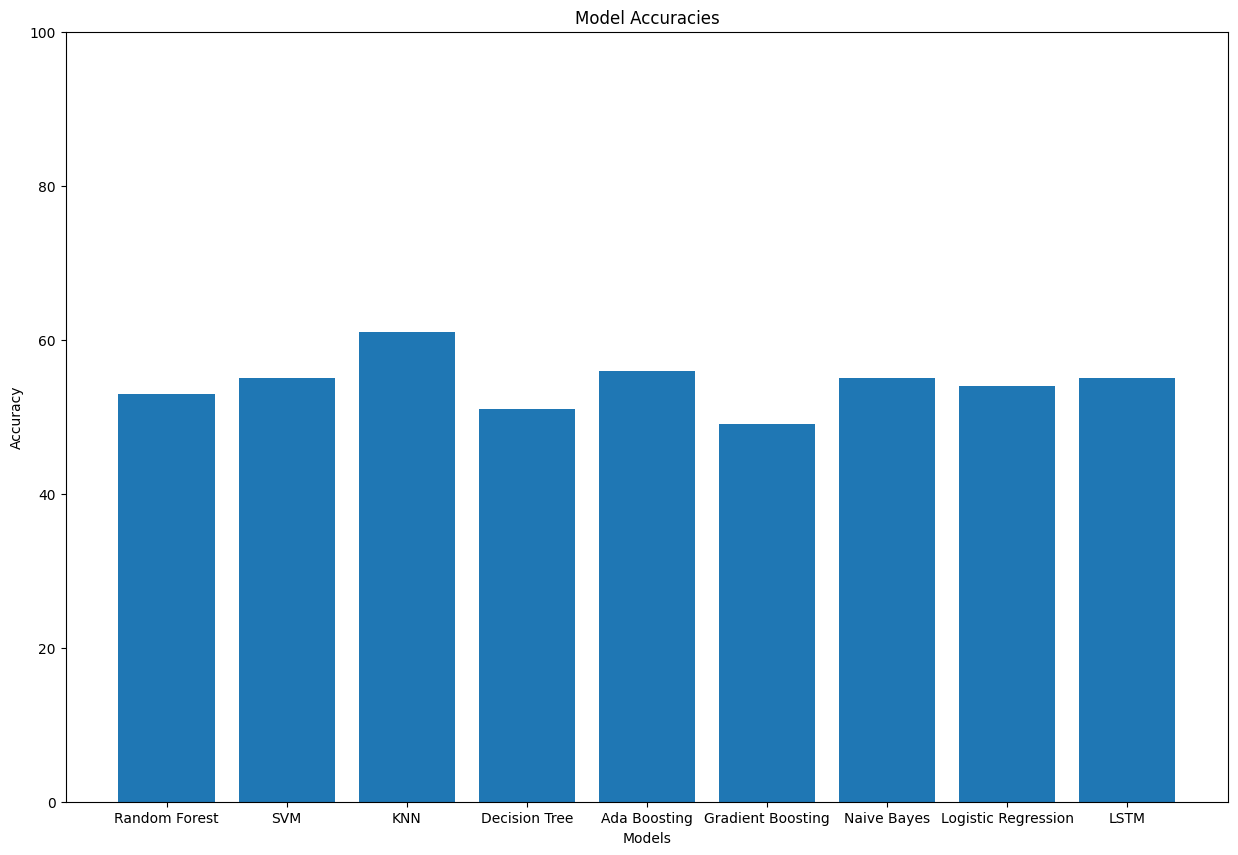

In [118]:
# Define the model names and their corresponding accuracies
model_names = accuracy_dict.keys()
accuracies = accuracy_dict.values()

plt.figure(figsize=(15, 10))
# Plotting the accuracies
plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim([0, 100])
plt.show()

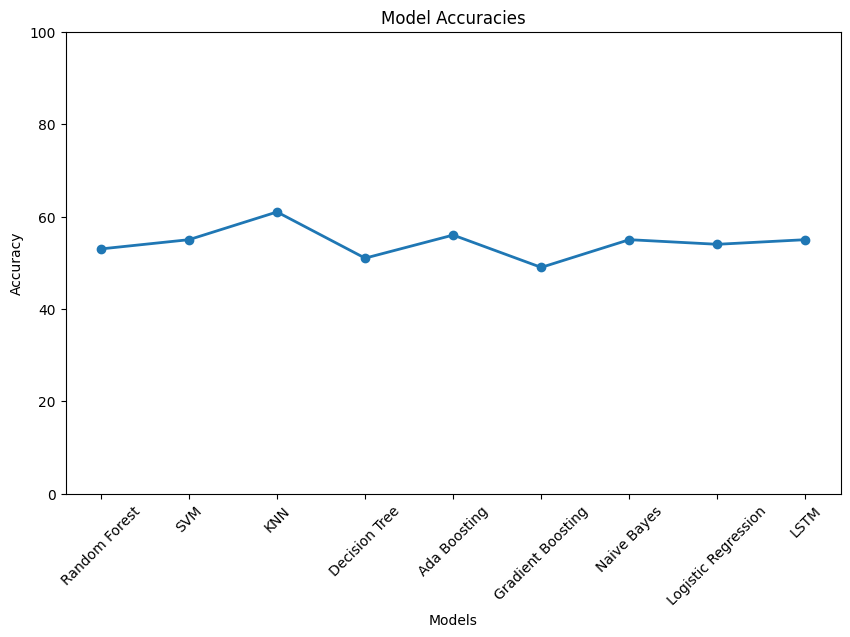

In [119]:
# Define the model names and their corresponding accuracies
model_names = accuracy_dict.keys()
accuracies = accuracy_dict.values()

# Convert the accuracies to a list
accuracies_list = list(accuracies)

# Generate x-coordinates for the line graph
x_coords = range(len(model_names))

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(x_coords, accuracies_list, marker='o', linestyle='-', linewidth=2)
plt.xticks(x_coords, model_names, rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim([0, 100])
plt.show()

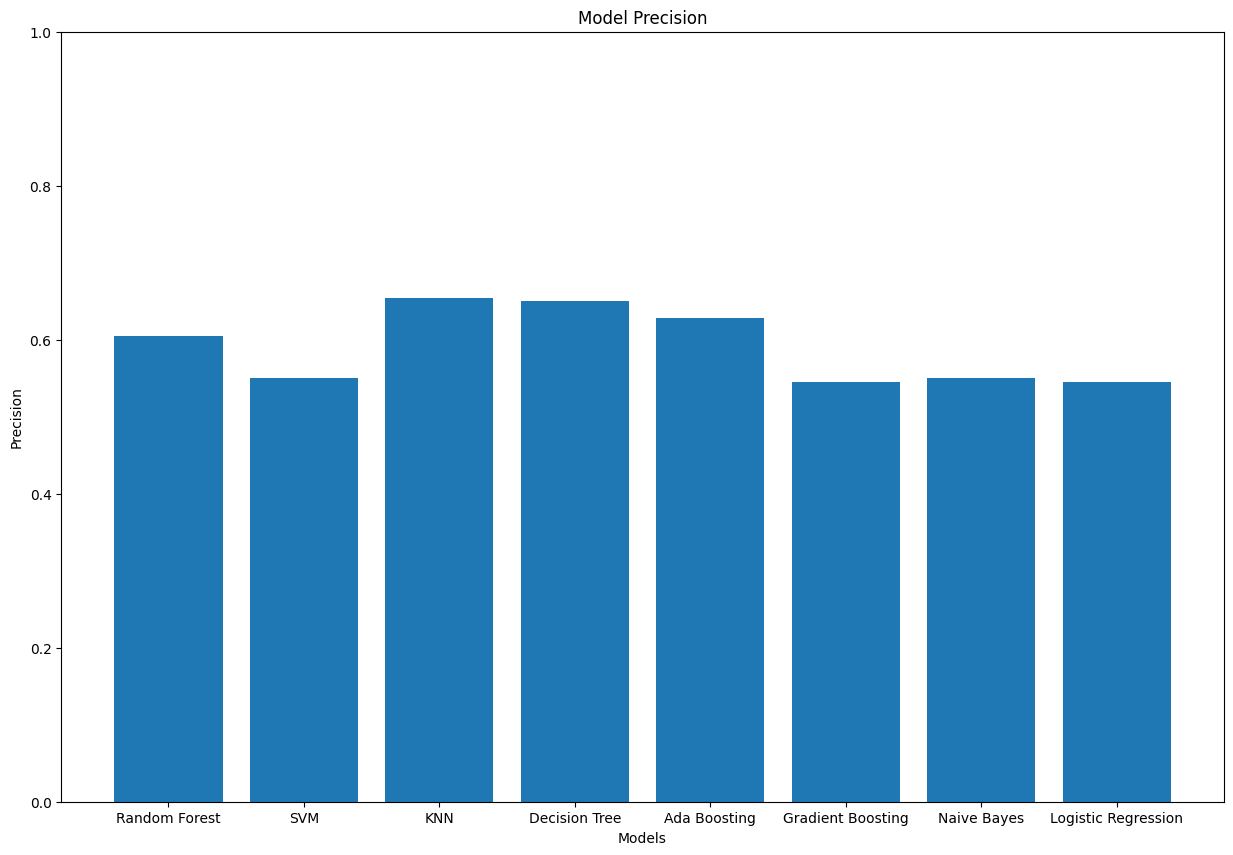

In [120]:
# Define the model names and their corresponding precision
model_names = precision_dict.keys()
precision = precision_dict.values()

plt.figure(figsize=(15, 10))
# Plotting the precision
plt.bar(model_names, precision)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Model Precision')
plt.ylim([0, 1])
plt.show()

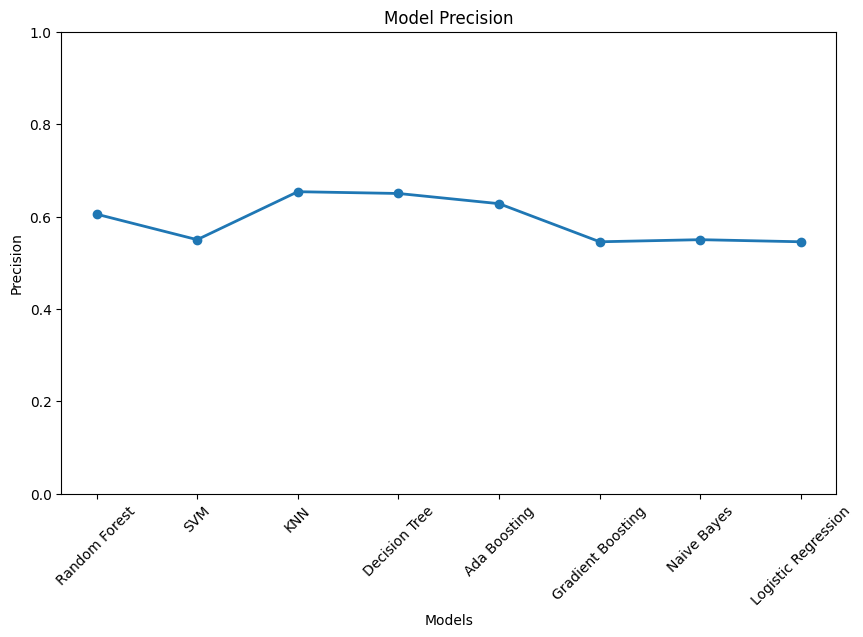

In [121]:
# Define the model names and their corresponding precision
model_names = precision_dict.keys()
precision = precision_dict.values()

# Convert the precision to a list
precision_list = list(precision)

# Generate x-coordinates for the line graph
x_coords = range(len(model_names))

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(x_coords, precision_list, marker='o', linestyle='-', linewidth=2)
plt.xticks(x_coords, model_names, rotation=45)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Model Precision')
plt.ylim([0, 1])
plt.show()

# Voting Classifier

In [125]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create a Voting Classifier
voting_model = VotingClassifier(estimators=[('ada_boosting', adaboost_model),('knn',knn_model)])

# Train the model
voting_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_voting = voting_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_voting)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 0.57


In [126]:
#calculatin precision recall
preds_voting = pd.Series(y_pred_voting, index = X_test.index)

# calculating the precision score
precision_score(y_test , preds_voting)

0.7142857142857143

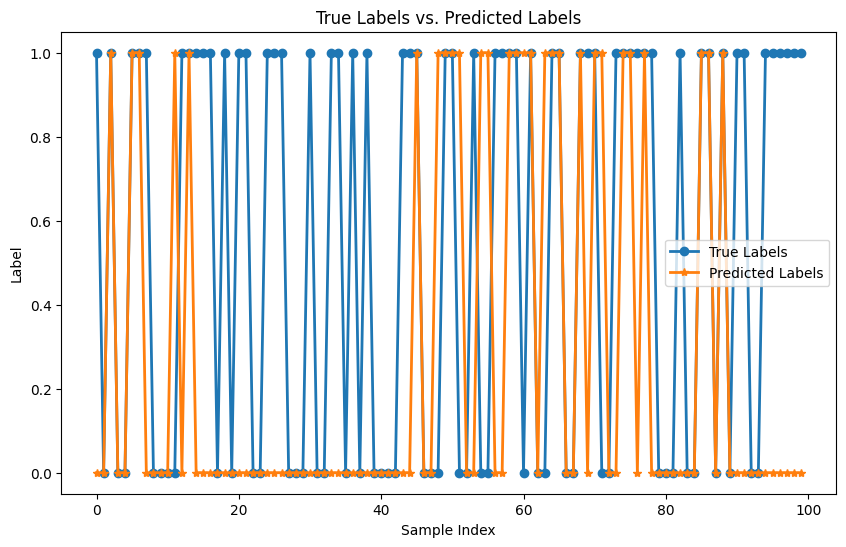

In [127]:
plot_predictions(y_pred_voting, y_test)